<a href="https://colab.research.google.com/github/hanene2030/pandas/blob/main/6_basic_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv")


# Bar plots
### Comparing discrete data

In [3]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [4]:
chest_pain = df.groupby(by="cp").median()
chest_pain.head(2)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
cp,,,,,,,,,,,,,
0,57.0,1.0,130.0,248.0,0.0,0.0,143.0,1.0,1.2,1.0,1.0,3.0,0.0
1,52.0,1.0,128.0,238.0,0.0,1.0,163.5,0.0,0.0,2.0,0.0,2.0,1.0


In [7]:
chest_pain = df.groupby(by="cp").median().reset_index()
#we have now the median value for every column grouped by chest pain
chest_pain.head(2)

,cp,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,57.0,1.0,130.0,248.0,0.0,0.0,143.0,1.0,1.2,1.0,1.0,3.0,0.0
1,1,52.0,1.0,128.0,238.0,0.0,1.0,163.5,0.0,0.0,2.0,0.0,2.0,1.0


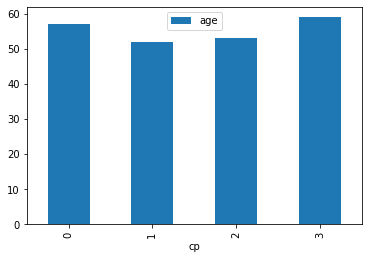

In [10]:
chest_pain.plot.bar(x="cp",y="age");


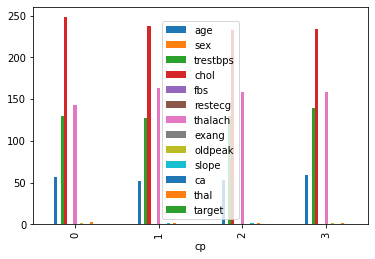

In [11]:
chest_pain.plot.bar(x="cp");

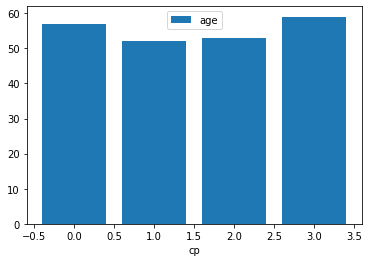

In [13]:
fig,ax = plt.subplots()
ax.bar(chest_pain["cp"],chest_pain["age"],label="age")
ax.set_xlabel("cp")
ax.legend();

### matplotlib more control but more code

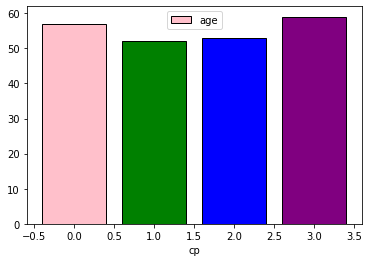

In [15]:
fig,ax = plt.subplots()
ax.bar(chest_pain["cp"],chest_pain["age"],label="age",edgecolor="k",color=["pink","green","blue","purple"])
ax.set_xlabel("cp")
ax.legend();

### Seaborn is built on top of matplotlib

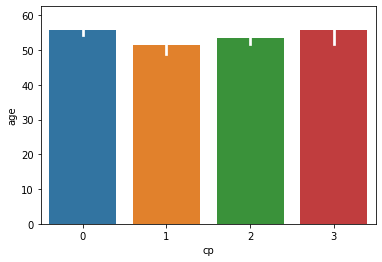

In [20]:
ax = sb.barplot(x="cp",y="age",errcolor="w",capsize=0.1,data=df)

# Scatter plots

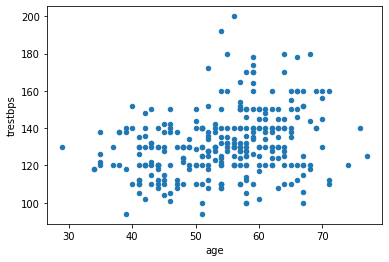

In [23]:
df.plot.scatter("age", "trestbps");

No handles with labels found to put in legend.


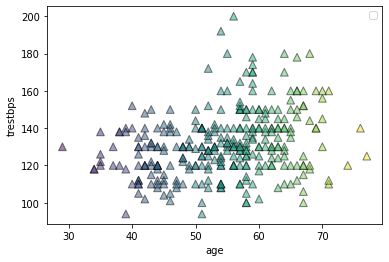

In [24]:
fig,ax = plt.subplots()
ax.scatter(df["age"],df["trestbps"],marker="^",s=60,c=df["age"],edgecolor="k", alpha=0.5)
ax.set_xlabel("age")
ax.set_ylabel("trestbps")
ax.legend();

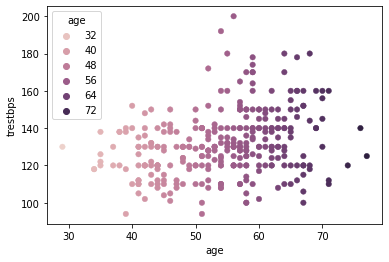

In [25]:
ax = sb.scatterplot(x="age",y="trestbps",hue="age",s=30, edgecolor=None,data=df)

# Line plots

In [26]:
#relationship betwenn age and choloestrol

In [27]:
ages = df.groupby("age").median().reset_index()
ages.head(2) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.00,2.0,0.0,2.0,1.0
1,34,0.5,2.0,118.0,196.0,0.0,0.5,183.0,0.0,0.35,2.0,0.0,2.0,1.0


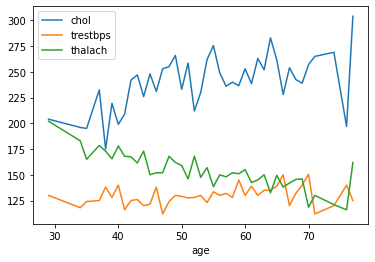

In [34]:
ages.plot.line("age",["chol","trestbps","thalach"]);
#This is useful for data that's on the same scale

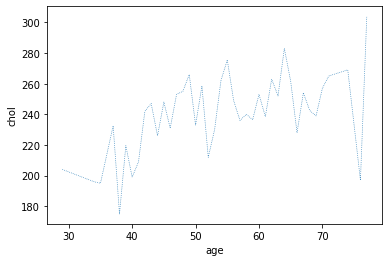

In [36]:
fig,ax = plt.subplots()
ax.plot(ages["age"],ages["chol"],ls=":",lw=0.7)
ax.set_xlabel("age")
ax.set_ylabel("chol");

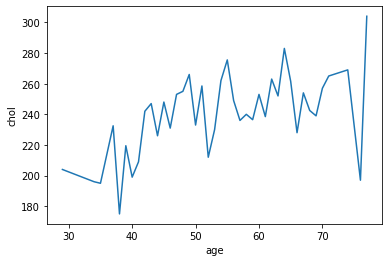

In [39]:
sb.lineplot(x="age",y="chol",data=ages);